# Sentiment Clustering

## Setup

### Imports

In [39]:
import json
import sys
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from datasketch import MinHash, MinHashLSH

plt.rcParams["figure.figsize"] = [20, 10]

### Data

In [59]:
jsonData = json.load(open("C:\\Users\\lukas\\Documents\\Waultar\\performance\\dataPoints.json", encoding="utf-16"))

x_list = []
y_list = []
count = 0
sentimentTextCount = 0
sentimentTextList = []

m1 = MinHash(num_perm=128)

for point in jsonData:
    count = count + 1
    # if "sentimentText" in point.keys() and len(point["sentimentText"]) > 0 and point["sentimentText"] != None:
    if point["sentimentScore"] != None:
        sentimentTextCount = sentimentTextCount + 1
        sentimentTextList.append(point["sentimentText"])
        x_list.append(count)
        y_list.append(point["sentimentScore"])

UnicodeError: UTF-16 stream does not start with BOM

## Cleaning of data, emojis and hashtags

In [56]:
#!/usr/bin/env python
import re

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

for text in sentimentTextList:
    print(deEmojify(text))

#boostaff #martialart #martialartslife #martialartstricking #taekwondo #tkd #wushu #parkour #sport #training #practice #freerunning #martialartist #karate #wingchun #aikido #ninja #flip #precision #kicks #kick #flips #scoot #gymnastics #changbong #lvol
#bostafftraining #martial_arts #martialart #martialartslife #martialartstricking #taekwondo #tkd #wushu #parkour #sport #training #practice #freerunning #martialartist #karate #wingchun #aikido #ninja #flip #kicks #kick #flips #twist #gymnastics #flie #lvol
ð¤ð¤ð¤
ð¤ð¤ð¤ð¤
ð¤ð¤ð¤
ð¤ð¤ð¤ð¤
ð¤ð¤ð¤
ð¤ð¤ð¤
ð¤ð¤ð¤
ð¤ð¤ð¤
ð¤ð¤ð¤
ð¤ð¤ð¤
Awesome mate!
ð¤ð¤ð¤
ð¤ð¤ð¤
ð¤ð¤ð¤
So true xD !
ð¤ð¤ð¤
ð¤ð¤ð¤
ð¤ð¤
ð¤ð¤
ð¤
ð¤ð¤
awesome mate! ð¤ð¤
ð¤ð¤
#cork #swingthrough #martialart #martialartslife #martialartstricking #taekwondo #tkd #wushu #parkour #sport #training #practice #freerunning #martialartist #karate #wingchun #aikido #ninja #flip

## Overview of sentiment data

In [45]:
print(f"##### Start of DataPoint Analysis ####")
print(f"Total amount of data points: {count}")
print(f"{sentimentTextCount} sentiment text found")
print(f"##### End of DataPoint Analysis ####")

##### Start of DataPoint Analysis ####
Total amount of data points: 3354
677 sentiment text found
##### End of DataPoint Analysis ####


## Clustering of data

[[2.36500000e+02 4.33069353e-01]
 [6.92853881e+02 4.50929571e-01]
 [4.65500000e+02 4.48094034e-01]]


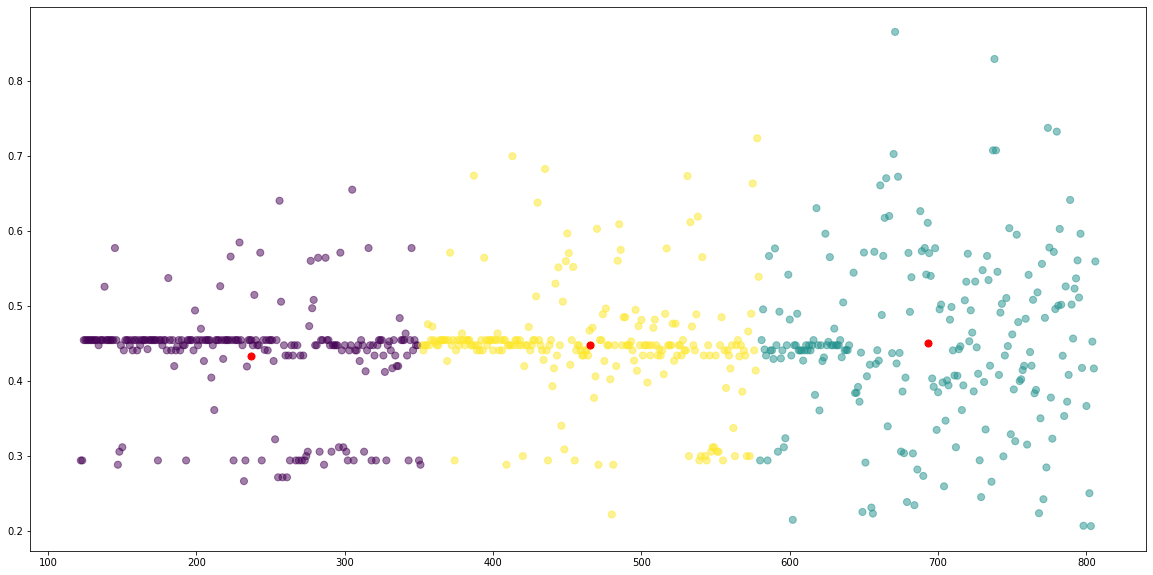

In [37]:
rawData = {'x': x_list, 'y': y_list}
df = DataFrame(rawData, columns=['x','y'])

kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [35]:
#test
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    analyzer='word',
    ngram_range=(1, 3),
    min_df=0,
    stop_words='english')
X_tfidf = tfidf.fit_transform(df['x'])
X_tfidf

<677x6185 sparse matrix of type '<class 'numpy.float64'>'
	with 15501 stored elements in Compressed Sparse Row format>